ZADANIE 1.

In [1]:
f(x) =  x^3 - x^2 + 50x +6
a = -50
b = 50
y = 3

3

In [2]:
function maks(a,step,b,y)
    list = []
    for x in range(a, step=step , b)
        if f(x) <= y
        append!(list,x)
        end
    end
    return maximum(list)
end
print(maks(-50,0.001,50,3))


-0.06

In [3]:
function minim(a,step,b,y)
    list = []
    for x in range(a, step=step , b)
        if f(x) >= y
        append!(list,x)
        end
    end
    return minimum(list)
end
print(minim(-50,0.001,50,3))

-0.059

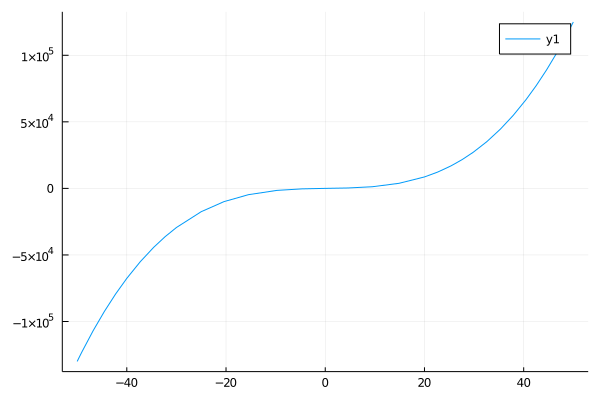

In [4]:
using Plots
plot(f, a,b)


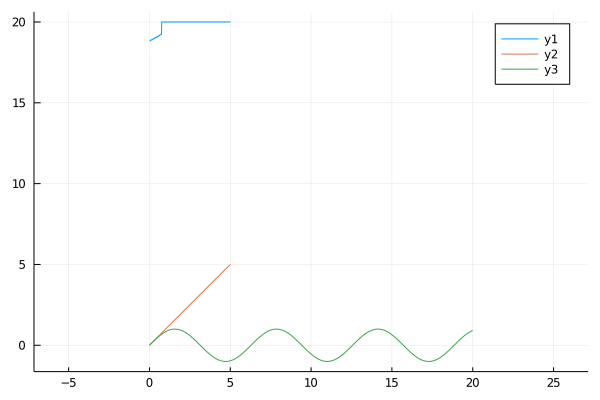

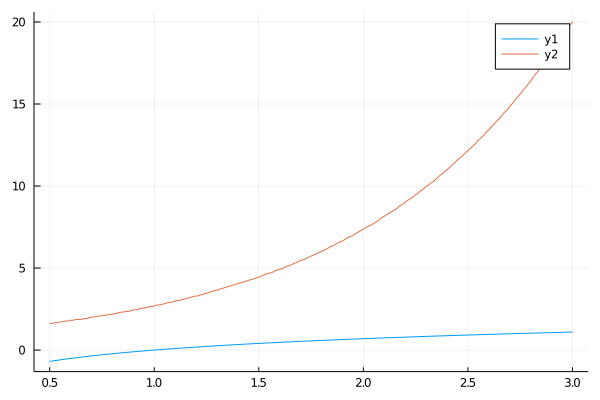

In [5]:
using Plots


f⁻¹(y) = maximum([x for x∈LinRange(0, 20, 600) if f(x)<=y])
   

# Jeśli nie jest monotoniczna to nie jest różnowartościowa więc nie jest odwracalna. Nie dziwi więc że mamy błędy 
# w wykresie, gdyż algorytm wybiera największy z tych x które mają określoną wartość


#PRZYKŁAD DLA SIN
f(x) = sin(2x)
E = LinRange(0.01, 5, 300)
tab_f⁻¹ = [f⁻¹(y) for y in E]
tab_f = [f(x) for x in LinRange(0, 10, 300)]
tb = [x for x in E]

plot(E, [tab_f⁻¹, tb])
plot!(aspect_ratio = 1)
plot!(LinRange(0, 20, 300), tab_f) |> display

E₂ = LinRange(0.5, 3, 200)
g(x) = log(x)
g⁻¹(y) = maximum([x for x∈LinRange(0.5, 20, 400) if g(x)<=y])
tab_g⁻¹ = [g⁻¹(y) for y in E₂]
tab_g = [g(x) for x in E₂]

plot(E₂, [tab_g,tab_g⁻¹])

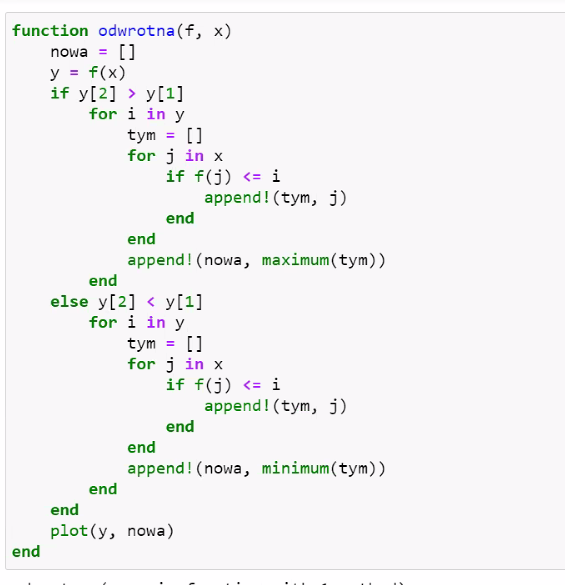

ZADANIE 2


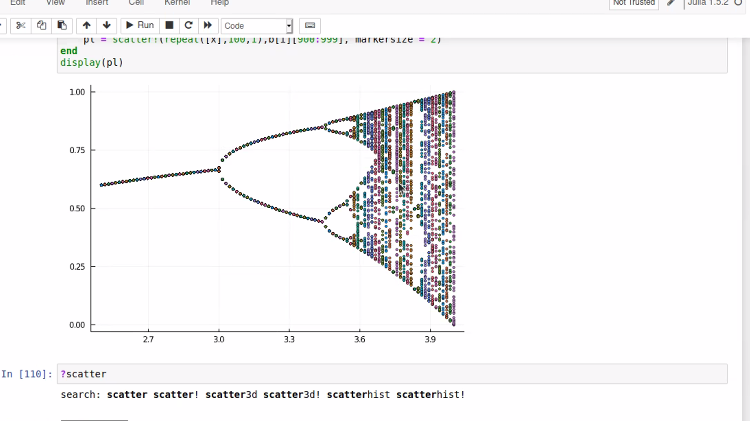

In [33]:
zeros(20,2)

20×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

[0.01; 0.011000000000000001; 0.012100000000000001; 0.013310000000000002; 0.014641000000000003; 0.016105100000000004; 0.017715610000000007; 0.019487171000000008; 0.021435888100000012; 0.023579476910000015; 0.025937424601000018; 0.02853116706110002; 0.031384283767210024; 0.03452271214393103; 0.03797498335832414; 0.04177248169415655; 0.04594972986357221; 0.050544702849929436; 0.05559917313492239; 0.06115909044841463; 0.0672749994932561; 0.07400249944258172; 0.0814027493868399; 0.0895430243255239; 0.09849732675807629; 0.10834705943388392; 0.11918176537727232; 0.13109994191499957; 0.14420993610649954; 0.1586309297171495; 0.17449402268886446; 0.19194342495775094; 0.21113776745352605; 0.23225154419887867; 0.25547669861876654; 0.2810243684806432; 0.30912680532870757; 0.34003948586157834; 0.3740434344477362; 0.41144777789250986; 0.4525925556817609; 0.497851811249937; 0.5476369923749307; 0.6024006916124238; 0.6626407607736663; 0.728904836851033; 0.8017953205361363; 0.8819748525897501; 0.97017233

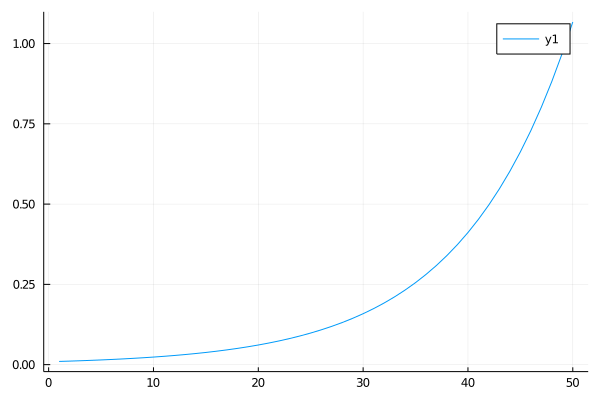

In [36]:
function malt(time, r, N₀)
    N = zeros(time, 1)
    N[1] = N₀
    for t in 2:time
        N[t] = N[t-1]*(1+r)       
    end
    return N
end

ed = 50 # the last ("ending") argument
using Plots
p = malt(ed, 0.1,  0.01)
ox = 1:ed
plot(ox, p)

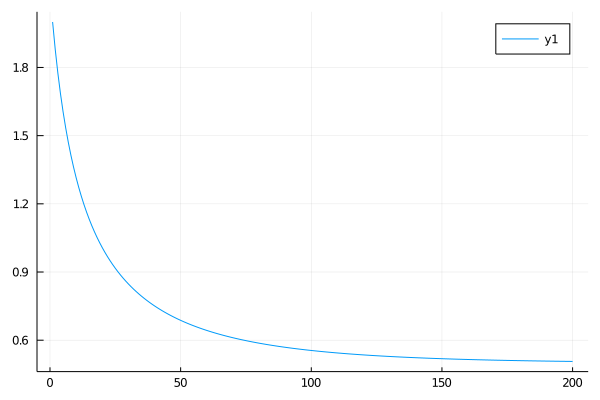

In [35]:
function verh(time, r, L, N₀, T::DataType = Float64, flag = false)
    N₀ = convert(T, N₀)
    r = convert(T, r)
    N = zeros(time, 1)
    N[1] = N₀
    for t in 2:time
        N[t] = N[t-1]+r*N[t-1]*(1.0-N[t-1]/L)
        if flag == true && t==15
            N[t] = round(N[t], digits = 3)
        end
    end
    return N
end

ed = 200 # the last ("ending") argument

using Plots

p = verh(ed, 0.02, 0.5, 2.0, Float64)
ox = 1:ed
plot(ox, p)

# dodatkowo różne typy danych i pokazane znaczenie dokładności w tym modelu - jak na zajęciach

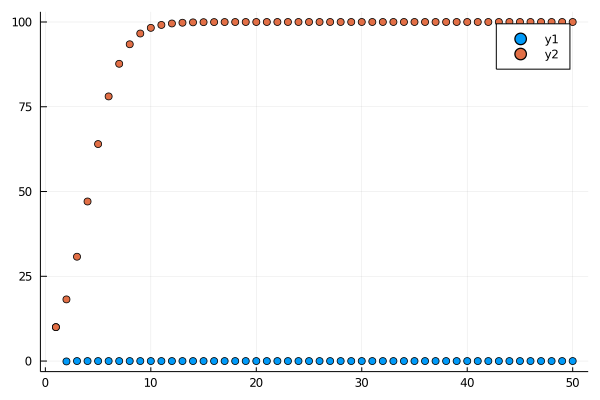

In [32]:
function rick(time, r, L, N₀)
    N = zeros(time, 1)
    a = 1/(1+r)
    b = (1-a)/L
    N[1] = N₀
    for t in 2:time
        N[t] = N[t-1]/(a+b*N[t-1])
        
    end
    return N
end


ed = 50 # the last ("ending") argument

using Plots

p = rick(ed, -1.01, 100, 10)
p_another = rick(ed, 1, 100, 10)
ox = 1:ed
scatter(ox, [p, p_another])

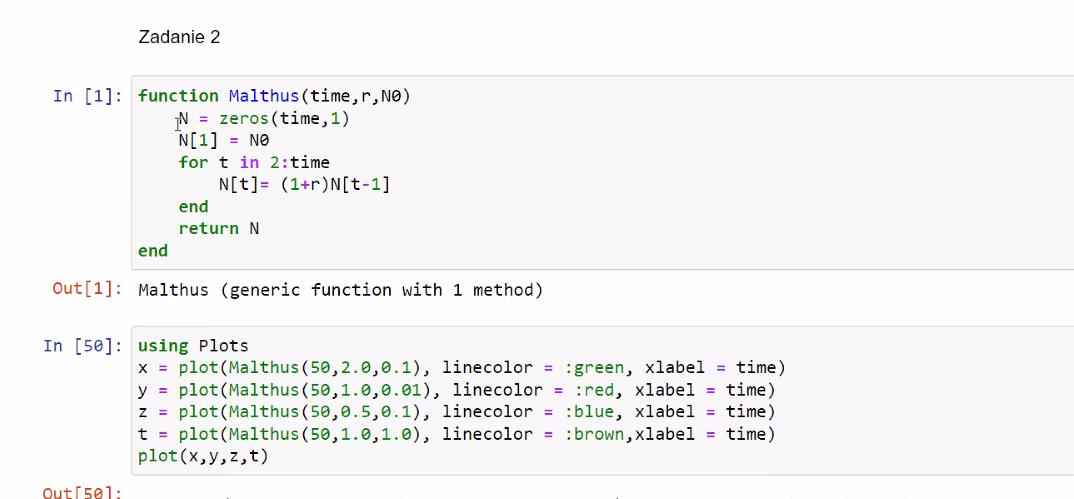

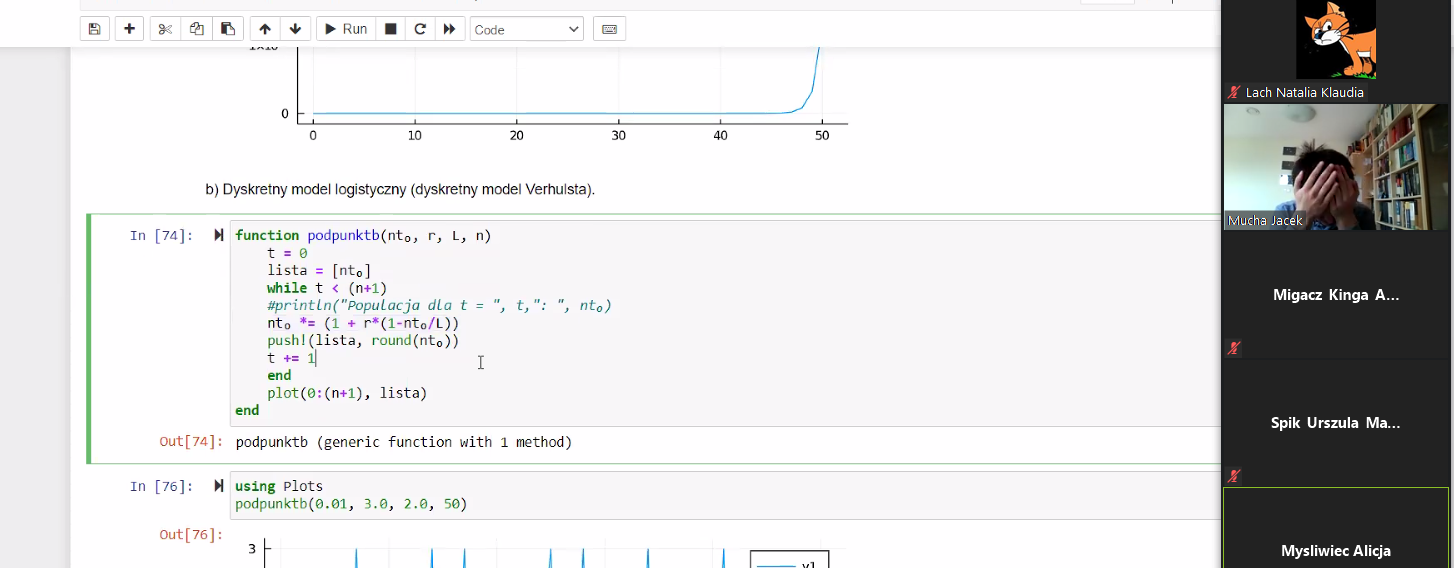

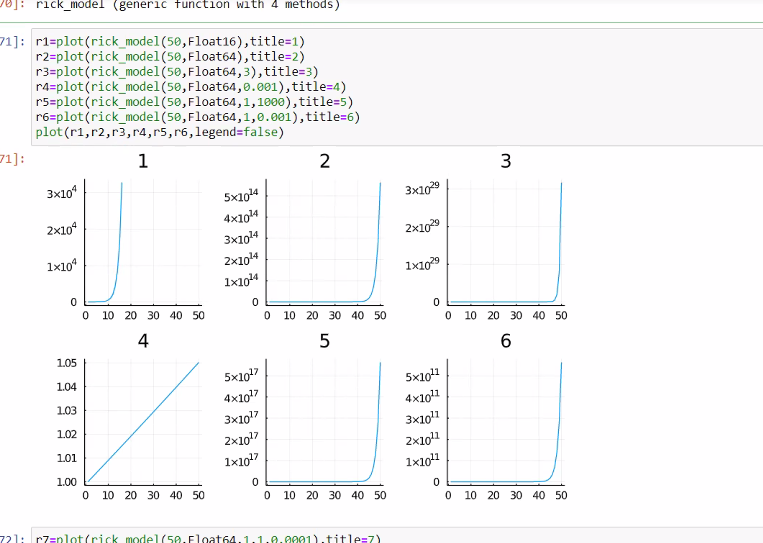

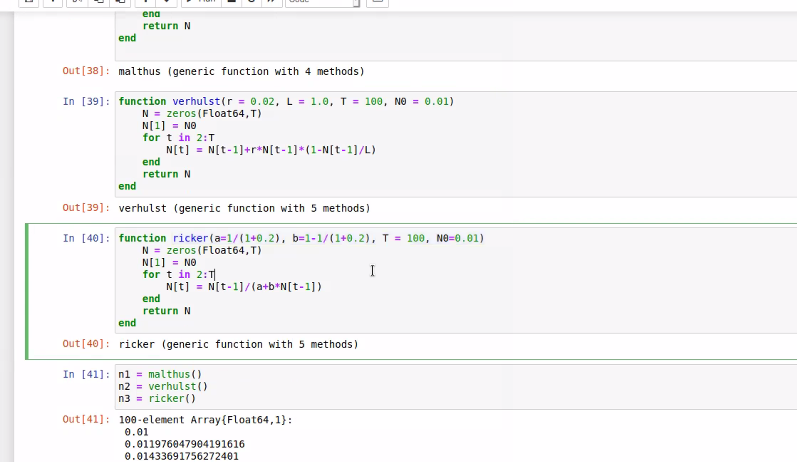

In [6]:
function sim(time, T::DataType, r=3.0, N0= 0.01, roundQ = false, breaks = 11, dig = 3)
    N0 = convert(T,N0)
    r = convert(T,r)
    N = zeros(T,time,1)
    N[1] =N0
    for k in 2:time
        N[k] = N[k-1] .+ r*N*(1.0-N[k-1])
        if roundQ && breaks == k
            N[k] = round(N[k], digits = dig)
        end
    end 
    return N
end
    

sim (generic function with 6 methods)

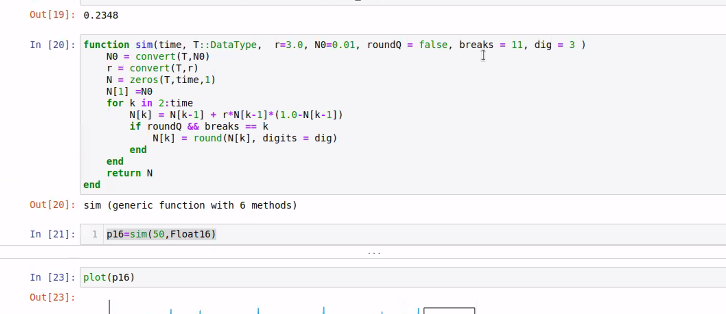

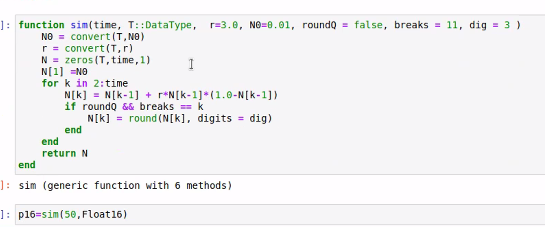

In [7]:
p64 = sim(50,Float64)

LoadError: [91mMethodError: [0mCannot `convert` an object of type [92mArray{Float64,2}[39m[0m to an object of type [91mFloat64[39m[39m
[91m[0mClosest candidates are:[39m
[91m[0m  convert(::Type{T}, [91m::T[39m) where T<:Number at number.jl:6[39m
[91m[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number at number.jl:7[39m
[91m[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:250[39m
[91m[0m  ...[39m

In [8]:
using Plots
plot(p16)


LoadError: [91mUndefVarError: p16 not defined[39m

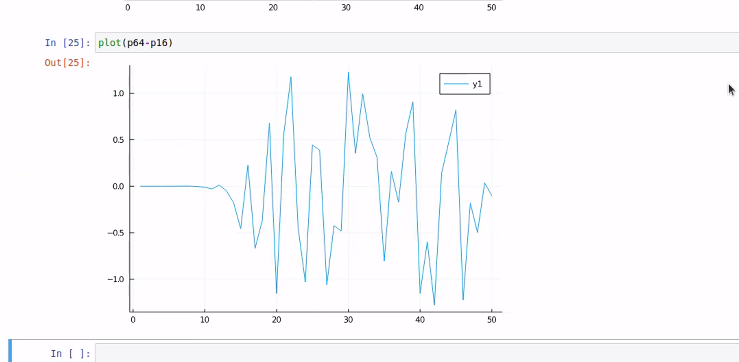

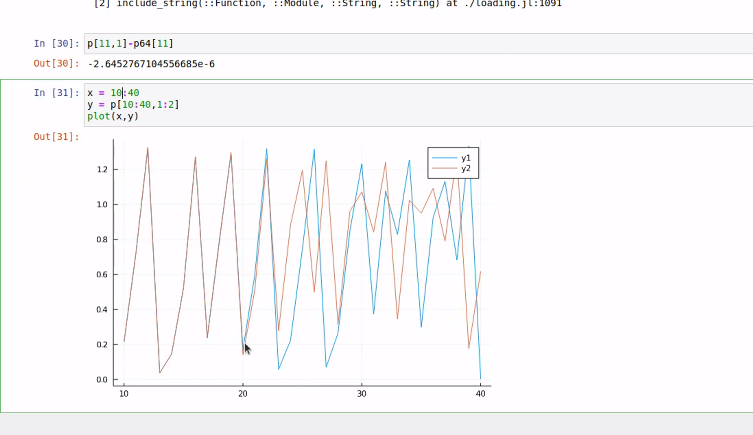

zadanie 3 a


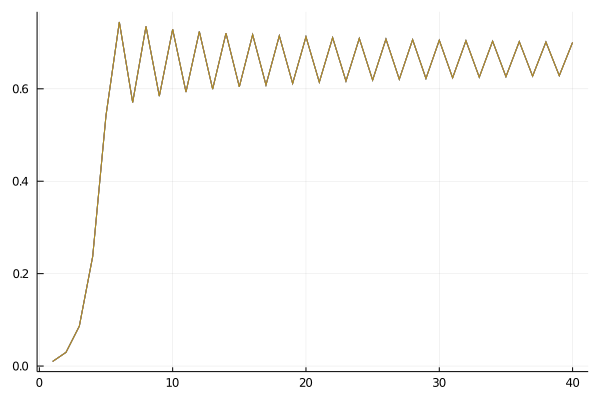

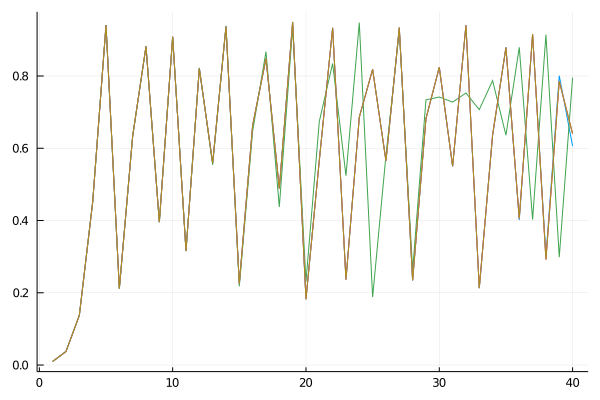

In [38]:
function verh2(time, λ, N₀, T::DataType = Float64, flag = false)
    N₀ = convert(T, N₀)
    r = convert(T, λ)
    N = zeros(time, 1)
    N[1] = N₀
    for t in 2:time
        N[t] = λ*N[t-1]*(1.0-N[t-1])
        #if flag == true && t==15
         #   N[t] = round(N[t], digits = 3)
        #end
                
    end
    return N
end

k = 3.8
ed = 40 # the last ("ending") argument

p1 = verh2(ed, k, 0.01, Float32)
p2 = verh2(ed, k, 0.01, Float64)
p3 = verh2(ed, k, 0.01, Float16)
p4 = verh2(ed, k, 0.01, BigFloat)
p5 = verh2(ed, k, 0.01, Float64, true)

k=3
r1 = verh2(ed, k, 0.01, Float32)
r2 = verh2(ed, k, 0.01, Float64)
r3 = verh2(ed, k, 0.01, Float16)
r4 = verh2(ed, k, 0.01, BigFloat)
r5 = verh2(ed, k, 0.01, Float64, true)

using Plots

ox = 1:ed
plot(ox, [r1,r2,r3,r4,r5], legend = false) |>display
plot(ox, [p1,p2,p3,p4,p5], legend = false) |>display

In [69]:
ed = 40
lin = LinRange(2.5, 4, 1000)
tb = [[verh2(ed, k, 0.01, Float64)[i] for k in lin] for i in 20:ed]
scatter(lin, tb, legend=false, markersize = 2, markercolor = :purple, markerstrokewidth = 0)

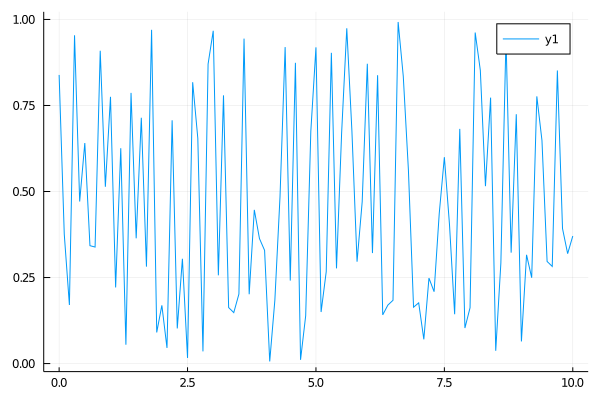

In [62]:
using Plots
using Random
y = rand(101)
x = range(0, step =0.1, 10)

plot(x,y)

ZADANIE 4

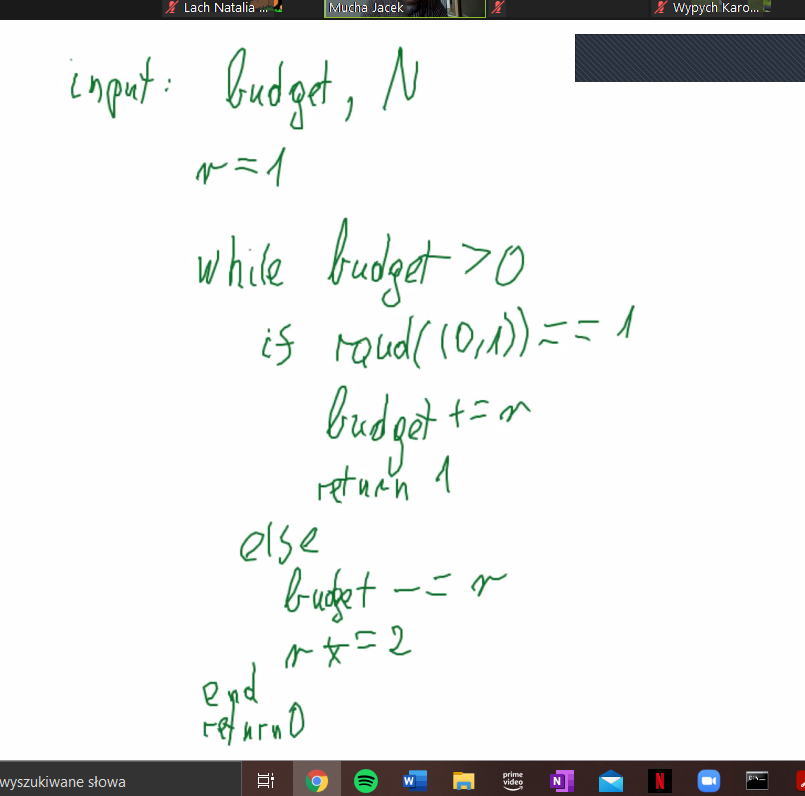

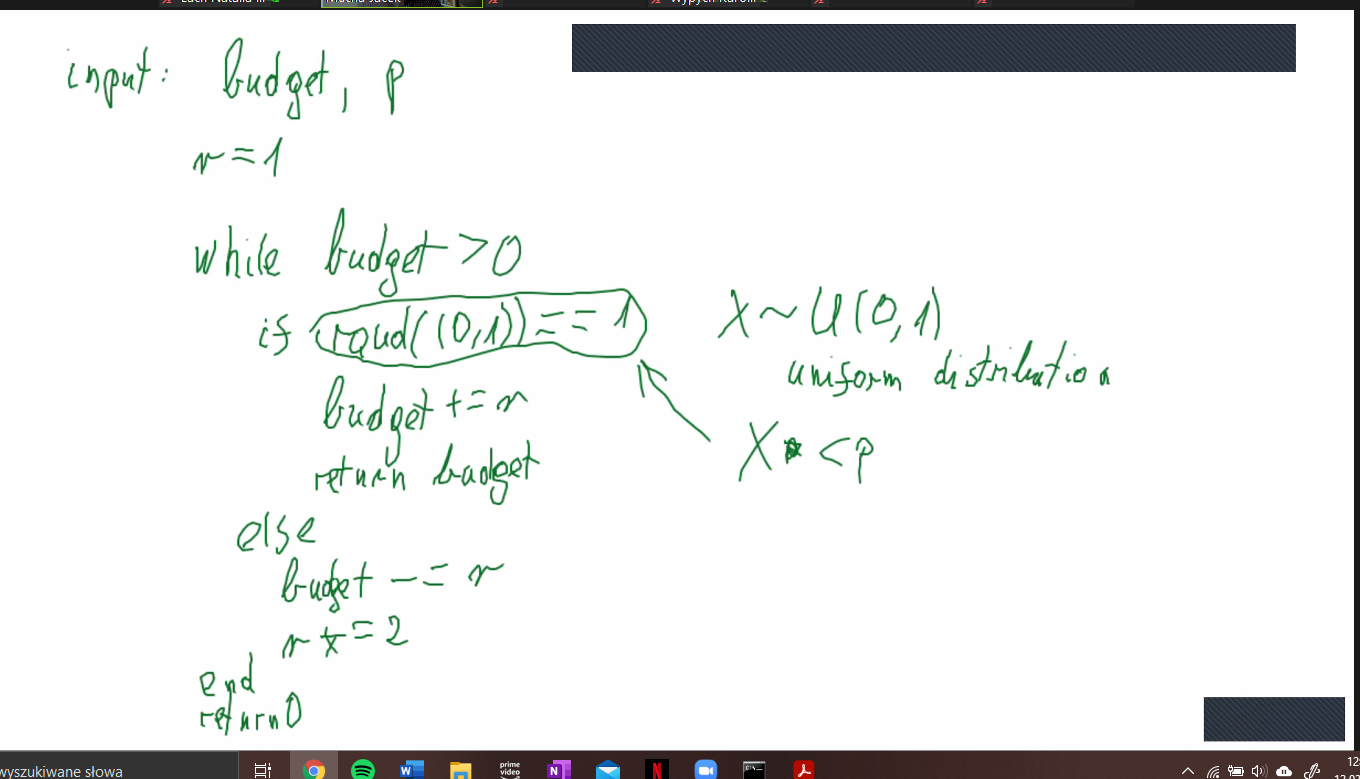

In [25]:
function casino(budget, bid)
    while budget>0
        decision = rand((0,1))
        throw = rand((0,1))
        
        if throw ==decision
            budget = budget + bid
            return 1
        else
            budget = budget - bid
            bid = bid*2
            
        end
    end
    return 0
end

casino (generic function with 1 method)

In [109]:

function probab(budget,bid,n)
    win = sum((casino(budget,bid)) for i in 1:n)
    prob = 100 - win / n * 100 
    #print("bankrupt probability : ", prob, "%")
    return prob
end


probab (generic function with 1 method)

In [78]:
probab(1000,10,10000)

bankrupt probability : 0.7900000000000063%

In [79]:
probab(100000,100,10000)

bankrupt probability : 0.10999999999999943%

In [80]:
probab(100,10,10000)

bankrupt probability : 5.739999999999995%

In [82]:
probab(100,20,10000)

bankrupt probability : 12.480000000000004%

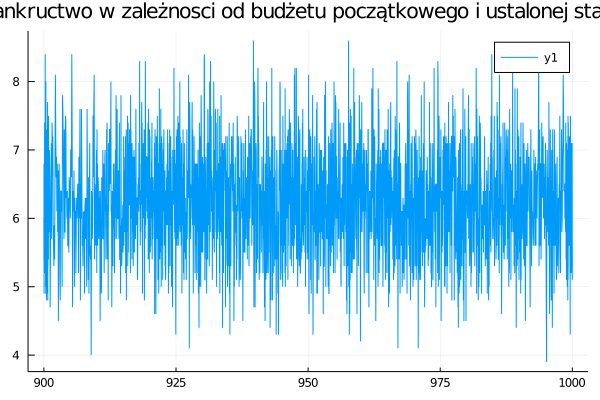

In [116]:

f(x) = probab(x,100,1000)
plot(f, 900, 1000, title = "bankructwo w zależnosci od budżetu początkowego i ustalonej stawki")


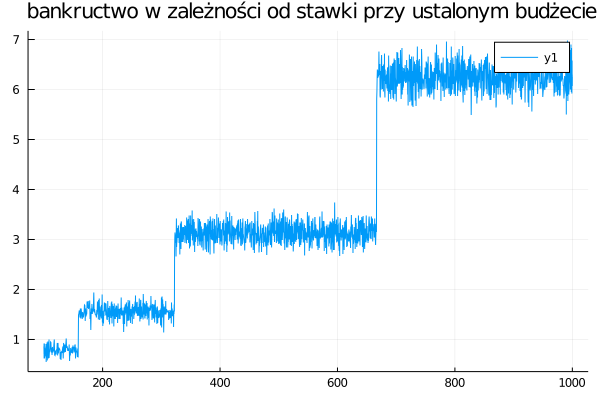

In [117]:
g(x) = probab(10000, x, 10000)
plot(g, 100,1000, title = " bankructwo w zależności od stawki przy ustalonym budżecie" )

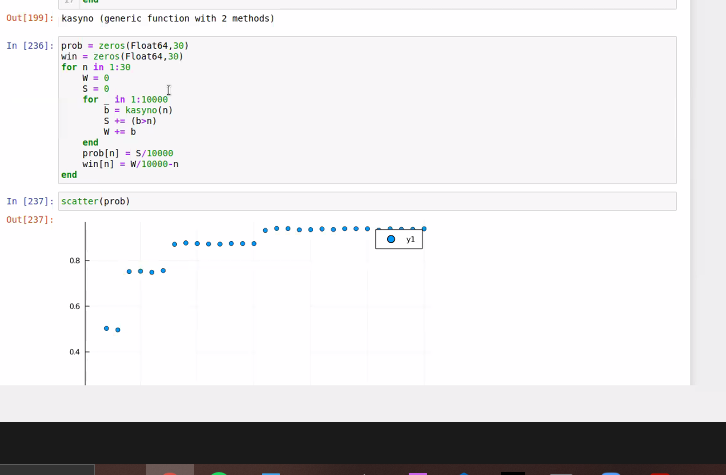

zadanie 5.

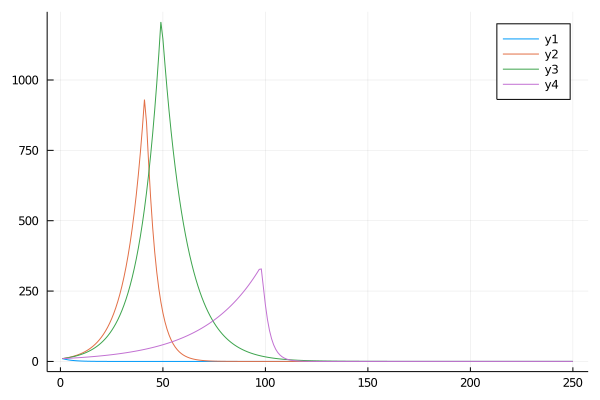

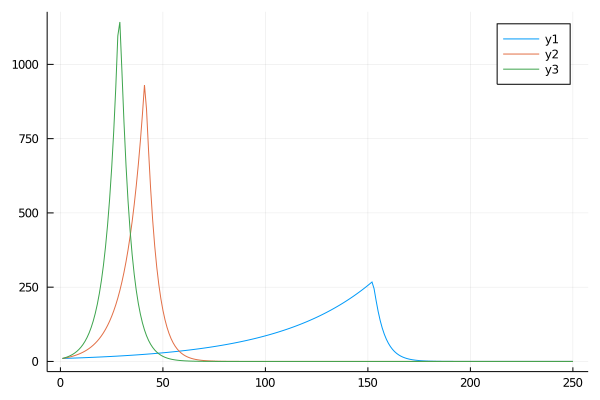

In [118]:
function pia(time, p, q, N₀, pop)
    N = zeros(time, 1)
    N[1] = N₀
    P = zeros(time, 1)
    P[1] = 0
    for t in 2:time
        N[t] = N[t-1]*(1+q-p-p*q)
        if N[t] >= pop
            N[t] = pop
        end
        pop = pop - N[t-1]*p*0.5
    end
    return N
end

ed = 250 # the last ("ending") argument
strt = 10

using Plots

p1 = pia(ed, 0.4, 0.35, strt, 2000)
p2 = pia(ed, 0.3, 0.6, strt, 2000)
p3 = pia(ed, 0.15, 0.3, strt, 2000)
p4 = pia(ed, 0.39, 0.7, strt, 2000)
ox = 1:ed
plot(ox, [p1, p2, p3, p4]) |> display



r1 = pia(ed, 0.3, 0.46, strt, 2000)
r2 = pia(ed, 0.3, 0.6, strt, 2000)
r3 = pia(ed, 0.3, 0.7, strt, 2000)
plot(ox, [r1, r2, r3])|> display